### Experimento 1.1

#### Descrição do experimento

Neste primeiro experimento o CCScore será executado sobre o conjunto de redações e faremos uma avaliação direta do valor obtido, com os valores da Competência 4 do conjunto de redações. 

Deseja-se avaliar se o cálculo do índice de coesão utilizado em Nobre (2011) pode ser suficiente para determinar o valor da coesão das redações. Para isso faremos uma comparação direta dos valores e as diferenças absolutas entre os valores obtidos serão considerados.

### Dados do conjunto de redações utilizados

O dataset de redações foi obtido a partir dos arquivos de redações do projeto BrasilEscola. 

As competência de maneira resumida, avaliam os seguintes aspectos da redação:
<pre>
Ortografia        ==  Competência 1
Adequação ao tema ==  Competência 2
Coerência         ==  Competência 3
Coesão            ==  Competência 4
Ética             ==  Competência 5
</pre>

O que é esperado de cada competência:
<ul>
<li><strong>Competência 1</strong>: Demonstrar domínio da norma culta da língua escrita.</li>   
<li><strong>Competência 2</strong>: Compreender a proposta da redação e aplicar conceito das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo.</li>
<li><strong>Competência 3</strong>: Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.</li>
<li><strong>Competência 4</strong>: Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.</li>
<li><strong>Competência 5</strong>: Elaborar a proposta de solução para o problema abordado, mostrando respeito aos valores humanos e considerando a diversidade sociocultural.</li>
</ul>

In [10]:
import sys
sys.path.append('../ccscore/')

import spacy
import pandas as pd
import pickle
import matplotlib
from infernal import feature_extraction as fe
from infernal import datastructures as ds
import confapp as config
config.TEP2_PATH = "../ccscore/data/tep2.pickle"

import helper_palavras as h_pal 
from text_document import TextDocument

### Carga do conjunto de dados da redações

As colunas contém:

<ol>
    <li>Texto: Texto original da redação. </li>
    <li>Nota: Nota total da redação (0-1000), considerando as 5 competências. </li>
    <li>Competência 1: Nota da Competência 1 (0-200)</li>
    <li>Competência 2: Nota da Competência 2 (0-200)</li>
    <li>Competência 3: Nota da Competência 3 (0-200)</li>
    <li>Competência 4: Nota da Competência 4 (0-200)</li>
    <li>Competência 5: Nota da Competência 5 (0-200)</li>
    <li>Qtd palavras:  Quantidade de palavras do texto</li>
    <li>Cadeias: Cadeias de Correferência obtidas com o CORP</li>
    <li>Palavras: Anotações sintáticas e semânticas do parser PALAVRAS</li>
    <li>Erros: Erros gramaticais encontrados pelo corretor CoGroo</li>
    <li>Entidades: Entidades detectadas pelo processo de vinculação de entidades</li>
    <li>Coesão Calculada: Valor da coesão calculada pelo CCScore</li>
<ol>

In [11]:
PATH_CORPUS = "../ccscore/data/Corpus_Redacoes.pickle"

# Carrega a base de redações
df_redacao = pickle.load(open(PATH_CORPUS, 'rb'))


In [12]:
def exibe_redacao(num_redacao, show_text=True):    
    texto = df_redacao['Texto'][num_redacao]
    anot_pal = df_redacao['Palavras'][num_redacao]
    nota_compt4 = df_redacao['Competência 4'][num_redacao]
    coesao_calculada = df_redacao['Coesão Calculada'][num_redacao]
    coesao_calculada1_1 = df_redacao['Coesão Calculada 1_1'][num_redacao]

    print(f"Num.: {num_redacao}\nCompetência 4: {nota_compt4} - Coesão Calculada: {coesao_calculada} - Coesão Calculada 1.1: {coesao_calculada1_1}\n")
    if show_text:
        print(texto)


O resultado a seguir mostra que o avaliador automático não atribuiu nota zero para nenhuma das redações. Diferentemento do avaliador que em algumas situações atribuiu esse valor. 

In [13]:
print("======== Experimento 1 ========")
print(f"Notas 0.0 atribuídas pelo corretor automático: {len(df_redacao[df_redacao['Coesão Calculada'] == 0.0])}")
print(f"Notas 0.0 atribuídas pelo corretor humano: {len(df_redacao[df_redacao['Competência 4'] == 0.0])}")

======== Experimento 1 ========
Notas 0.0 atribuídas pelo corretor automático: 0
Notas 0.0 atribuídas pelo corretor humano: 47


In [14]:
resultados_exp_1_1 = pickle.load(open('../ccscore/data/resultados_exp_1_1.pickle', 'rb'))

In [15]:
df_redacao['Coesão Calculada 1_1'] = resultados_exp_1_1['valores_coesao'].values()

In [16]:
df_redacao['Coesão Calculada 1_1']

0       150.00
1       100.00
2       150.00
3       100.00
4       100.00
         ...  
2595    115.71
2596     76.21
2597     87.80
2598     84.62
2599     90.71
Name: Coesão Calculada 1_1, Length: 2600, dtype: float64

In [17]:
print("======== Experimento 1.1 ========")
print(f"Notas 0.0 atribuídas pelo corretor automático: {len(df_redacao[df_redacao['Coesão Calculada 1_1'] == 0.0])}")
print(f"Notas 0.0 atribuídas pelo corretor humano: {len(df_redacao[df_redacao['Competência 4'] == 0.0])}")

======== Experimento 1.1 ========
Notas 0.0 atribuídas pelo corretor automático: 0
Notas 0.0 atribuídas pelo corretor humano: 47


A seguir calcula-se a diferença entre o valor da coesão calculada pelo CCScore e a nota dada peloa avaliador humano, bem como o valor da diferença absoluta. 

In [18]:
df_redacao['diferenca'] = df_redacao['Competência 4'] - df_redacao['Coesão Calculada']
df_redacao['diferenca_abs'] = abs(df_redacao['diferenca'])

df_redacao['diferenca 1_1'] = df_redacao['Competência 4'] - df_redacao['Coesão Calculada 1_1']
df_redacao['diferenca_abs 1_1'] = abs(df_redacao['diferenca 1_1'])

In [19]:
df_redacao[['Competência 4',
            'Coesão Calculada', 'diferenca', 'diferenca_abs', 
            'Coesão Calculada 1_1', 'diferenca 1_1', 'diferenca_abs 1_1']]


,Competência 4,Coesão Calculada,diferenca,diferenca_abs,Coesão Calculada 1_1,diferenca 1_1,diferenca_abs 1_1
0,150.0,150.00,0.00,0.00,150.00,0.00,0.00
1,100.0,100.00,0.00,0.00,100.00,0.00,0.00
2,150.0,150.00,0.00,0.00,150.00,0.00,0.00
3,100.0,100.00,0.00,0.00,100.00,0.00,0.00
4,100.0,100.00,0.00,0.00,100.00,0.00,0.00
...,...,...,...,...,...,...,...
2595,150.0,70.71,79.29,79.29,115.71,34.29,34.29
2596,150.0,70.61,79.39,79.39,76.21,73.79,73.79
2597,150.0,70.54,79.46,79.46,87.80,62.20,62.20
2598,150.0,70.51,79.49,79.49,84.62,65.38,65.38


<AxesSubplot:ylabel='Frequency'>

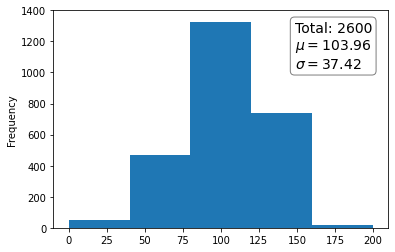

In [144]:
#### Distribuição das Notas da Competência 4 das redações

fig, ax = plt.subplots()    
plt.ylim(0.0, 1400.0)
p = df_redacao['Competência 4']
mu = p.mean()
sigma = p.std()

textstr = '\n'.join((r'Total: %d' % (df_redacao.shape[0]),
                     r'$\mu=%.2f$' % (mu, ),
                     r'$\sigma=%.2f$' % (sigma, )))

props = dict(boxstyle='round', 
             facecolor='white', 
             alpha=0.5)
ax.text(0.72, 0.95, 
        textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

p.plot.hist(bins=5)

<AxesSubplot:ylabel='Frequency'>

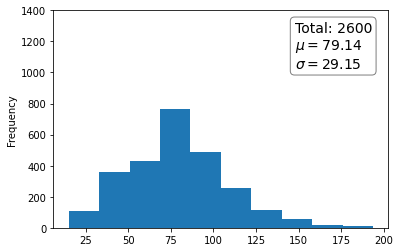

In [174]:
#### Distribuição da Coesão Calculada Experimento 1a

fig, ax = plt.subplots()    
plt.ylim(0.0, 1400.0)
p = df_redacao['Coesão Calculada']
mu = p.mean()
sigma = p.std()

textstr = '\n'.join((r'Total: %d' % (df_redacao.shape[0]),
                     r'$\mu=%.2f$' % (mu, ),
                     r'$\sigma=%.2f$' % (sigma, )))

props = dict(boxstyle='round', 
             facecolor='white', 
             alpha=0.5)
ax.text(0.72, 0.95, 
        textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

p.plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

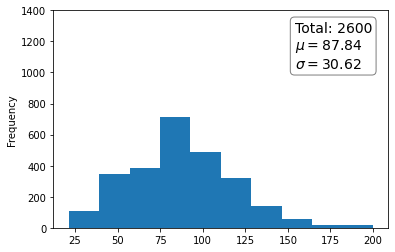

In [175]:
#### Distribuição da Coesão Calculada Experimento 1b

fig, ax = plt.subplots()    
plt.ylim(0.0, 1400.0)

p = df_redacao['Coesão Calculada 1_1']
mu = p.mean()
sigma = p.std()

textstr = '\n'.join((r'Total: %d' % (df_redacao.shape[0]),
                     r'$\mu=%.2f$' % (mu, ),
                     r'$\sigma=%.2f$' % (sigma, )))

props = dict(boxstyle='round', 
             facecolor='white', 
             alpha=0.5)
ax.text(0.72, 0.95, 
        textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

p.plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

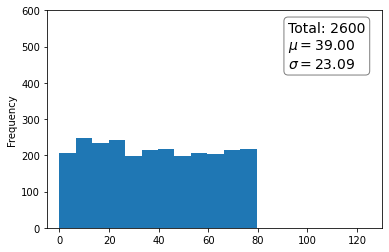

In [165]:
### Distribuição da Diferença Absoluta Experimento 1a

import matplotlib.pyplot as plt
fig, ax = plt.subplots()    
plt.ylim(0.0, 600.0)
plt.xlim(-5.0, 130.0)

p = df_redacao['diferenca_abs']
mu = p.mean()
sigma = p.std()

textstr = '\n'.join((r'Total: %d' % (df_redacao.shape[0]),
                     r'$\mu=%.2f$' % (mu, ),
                     r'$\sigma=%.2f$' % (sigma, )))


props = dict(boxstyle='round', 
             facecolor='white', 
             alpha=0.5)
ax.text(0.72, 0.95, 
        textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

p.plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

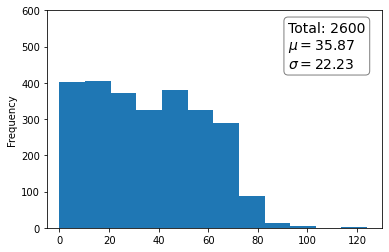

In [170]:
### Distribuição da Diferença Absoluta Experimento 1b

import matplotlib.pyplot as plt
fig, ax = plt.subplots()    
plt.ylim(0.0, 600.0)
plt.xlim(-5.0, 130.0)
p = df_redacao['diferenca_abs 1_1']
mu = p.mean()
sigma = p.std()

textstr = '\n'.join((r'Total: %d' % (df_redacao.shape[0]),
                     r'$\mu=%.2f$' % (mu, ),
                     r'$\sigma=%.2f$' % (sigma, )))


props = dict(boxstyle='round', 
             facecolor='white', 
             alpha=0.5)
ax.text(0.72, 0.95, 
        textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

p.plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

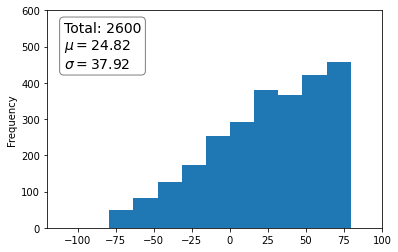

In [167]:
### Distribuição da Diferença Experimento 1a

import matplotlib.pyplot as plt
fig, ax = plt.subplots()    
plt.ylim(0.0, 600.0)
plt.xlim(-120.0, 100.0)

p = df_redacao['diferenca']
mu = p.mean()
sigma = p.std()

textstr = '\n'.join((r'Total: %d' % (df_redacao.shape[0]),
                     r'$\mu=%.2f$' % (mu, ),
                     r'$\sigma=%.2f$' % (sigma, )))

props = dict(boxstyle='round', 
             facecolor='white', 
             alpha=0.5)
ax.text(0.05, 0.95, 
        textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

p.plot.hist()

<AxesSubplot:ylabel='Frequency'>

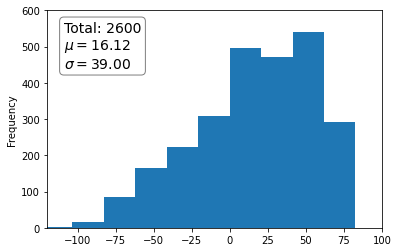

In [166]:
### Distribuição da Diferença Experimento 1b

import matplotlib.pyplot as plt
fig, ax = plt.subplots()    
plt.ylim(0.0, 600.0)
plt.xlim(-120.0, 100.0)

p = df_redacao['diferenca 1_1']
mu = p.mean()
sigma = p.std()

textstr = '\n'.join((r'Total: %d' % (df_redacao.shape[0]),
                     r'$\mu=%.2f$' % (mu, ),
                     r'$\sigma=%.2f$' % (sigma, )))

props = dict(boxstyle='round', 
             facecolor='white', 
             alpha=0.5)
ax.text(0.05, 0.95, 
        textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

p.plot.hist()

<AxesSubplot:ylabel='Frequency'>

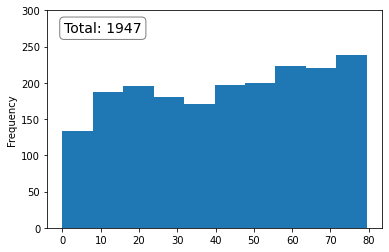

In [168]:
### Distribuição da Diferença Positiva Experimento 1a

import matplotlib.pyplot as plt
fig, ax = plt.subplots()    
plt.ylim(0.0, 300.0)
p = df_redacao[df_redacao['diferenca'] >= 0]

textstr = r'Total: %d' % (p.shape[0])
props = dict(boxstyle='round', 
             facecolor='white', 
             alpha=0.5)
ax.text(0.05, 0.95, 
        textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

p['diferenca'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

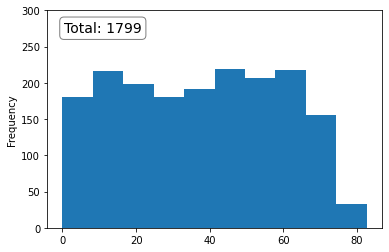

In [63]:
### Distribuição da Diferença Positiva Experimento 1b

import matplotlib.pyplot as plt
fig, ax = plt.subplots()    
plt.ylim(0.0, 300.0)
p = df_redacao[df_redacao['diferenca 1_1'] >= 0]

textstr = r'Total: %d' % (p.shape[0])
props = dict(boxstyle='round', 
             facecolor='white', 
             alpha=0.5)
ax.text(0.05, 0.95, 
        textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

p['diferenca 1_1'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

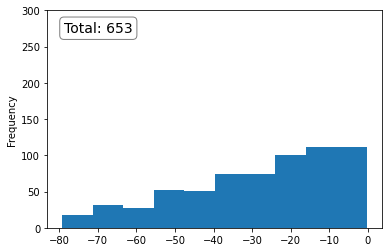

In [51]:
### Distribuição da Diferença Negativa Experimento 1a

fig, ax = plt.subplots()    
plt.ylim(0.0, 300.0)
p = df_redacao[df_redacao['diferenca'] < 0]

textstr = r'Total: %d' % (p.shape[0])
props = dict(boxstyle='round', 
             facecolor='white', 
             alpha=0.5)
ax.text(0.05, 0.95, 
        textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

p['diferenca'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

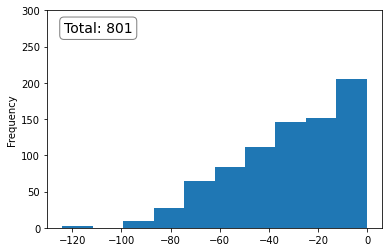

In [26]:
### Distribuição da Diferença Negativa Experimento 1b

fig, ax = plt.subplots()    
plt.ylim(0.0, 300.0)
p = df_redacao[df_redacao['diferenca 1_1'] < 0]

textstr = r'Total: %d' % (p.shape[0])
props = dict(boxstyle='round', 
             facecolor='white', 
             alpha=0.5)
ax.text(0.05, 0.95, 
        textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

p['diferenca 1_1'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

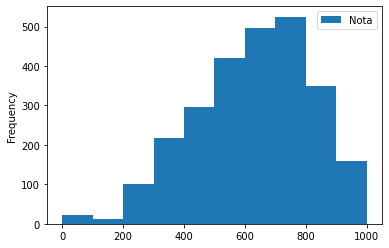

In [27]:
#### Distribuição das Notas da redações

df_redacao[['Nota']].plot.hist()

In [28]:
#Python code
#Example ofD’Agostino’s K-squared Test
from scipy.stats import normaltest
data = df_redacao[['Nota']].values
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Data follows normal')
else:
 print('Data does not follow normal')
#OUTPUT:
#stat=3.392, p=0.183
#Data follows normal

stat=82.781, p=0.000
Data does not follow normal


In [29]:
from scipy.stats import anderson
data = list(zip(*df_redacao[['Nota']].values))
result = anderson(data[0])
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i]
 if result.statistic < cv:
  print('Data follows Normal at the %.1f%% level' % (sl))
 else:
  print('Data does not follows Normal at the %.1f%% level' % (sl))

stat=21.692
Data does not follows Normal at the 15.0% level
Data does not follows Normal at the 10.0% level
Data does not follows Normal at the 5.0% level
Data does not follows Normal at the 2.5% level
Data does not follows Normal at the 1.0% level


#### Distribuição dos valores calculados de coesão

/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:ylabel='Frequency'>

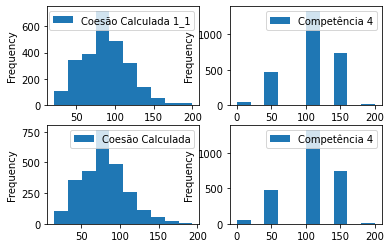

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)

df_redacao[['Coesão Calculada 1_1']].plot.hist(ax=axes[0,0])
df_redacao[['Competência 4']].plot.hist(ax=axes[0,1])
df_redacao[['Coesão Calculada']].plot.hist(ax=axes[1,0])
df_redacao[['Competência 4']].plot.hist(ax=axes[1,1])

In [37]:
import scipy

#pvalue=scipy.stats.t.cdf(results.tvalues['lenroll'],results.df_resid) 
from scipy.stats import shapiro
#data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data = list(df_redacao['Coesão Calculada'])
stat, p_value = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')
    

# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
#data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


stat=0.982, p=0.183
Probably not Gaussian
stat=114.709, p=0.000
Probably not Gaussian


In [124]:
from scipy.stats import ttest_ind
#data1 = df_redacao['Competência 4']
data1 = df_redacao['Coesão Calculada']
data2 = df_redacao['Coesão Calculada 1_1']
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')
    
    
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


stat=-10.491, p=0.000
Probably different distributions
stat=-41.858, p=0.000
Probably different distributions


In [125]:
from scipy.stats import ttest_ind
#data1 = df_redacao['Competência 4']
data1 = df_redacao['diferenca']
data2 = df_redacao['diferenca 1_1']
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')
    
    
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=8.154, p=0.000
Probably different distributions
stat=41.858, p=0.000
Probably different distributions


In [114]:
from scipy import stats

stats.ttest_rel(df_redacao['Competência 4'],
                df_redacao['Coesão Calculada 1_1'])

Ttest_relResult(statistic=21.07798769255448, pvalue=3.540146048017893e-91)

In [120]:
from scipy import stats

stats.ttest_1samp(df_redacao['Coesão Calculada 1_1'],                  
                  df_redacao['Competência 4'].mean())

Ttest_1sampResult(statistic=-26.846104145708328, pvalue=2.489552921195178e-140)

In [123]:
from statsmodels.stats.weightstats import ztest
import scipy.stats as scp_stats
import math

#data1 = df_redacao['Competência 4']
data1 = df_redacao['Coesão Calculada 1_1']
media_data1 = data1.mean()
std_data1 = data1.std()
n_data1 = len(data1)
data2 = df_redacao['Coesão Calculada']
media_data2 = data2.mean()
std_data2 = data2.std()
n_data2 = len(data2)

t = (media_data1 - media_data2)/math.sqrt((std_data1*std_data1)/n_data1+
                                          ((std_data2*std_data2)/n_data2))
stat_, p = ztest(data2, value=media_data1)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(2)))

print('t-valor: {}'.format(t.round(2)))



Estatística de teste: -41.86
p-valor: 0.0
t-valor: 10.49


#### Avaliação das diferenças absolutas entre a Coesão Calculada e os valores da Competência 4 atribuidos pelo avaliador

A seguir temos uma distribuição dos valores absolutos da diferença entre os valores atribuidos pelos corretores humanos e o processo avaliação automática. 


<AxesSubplot:ylabel='Frequency'>

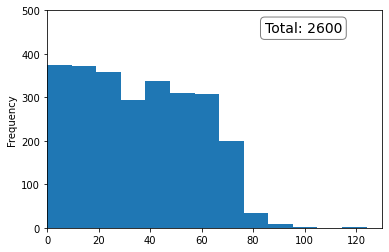

In [82]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()    
plt.ylim(0.0, 500)
plt.xlim(0.0, 130)
textstr = r'Total: %d' % (df_redacao.shape[0])
props = dict(boxstyle='round', 
             facecolor='white', 
             alpha=0.5)
ax.text(0.65, 0.95, 
        textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

df_redacao['diferenca_abs 1_1'].plot.hist(bins=13)

<AxesSubplot:ylabel='Frequency'>

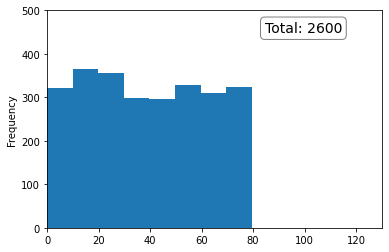

In [70]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()    
plt.ylim(0.0, 500.0)
plt.xlim(0.0, 130)
textstr = r'Total: %d' % (df_redacao.shape[0])
props = dict(boxstyle='round', 
             facecolor='white', 
             alpha=0.5)
ax.text(0.65, 0.95, 
        textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

df_redacao['diferenca_abs'].plot.hist(bins=8)

/home/willian/miniconda3/envs/ccscore/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:ylabel='Frequency'>

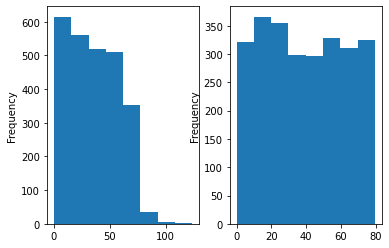

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df_redacao['diferenca_abs 1_1'].plot.hist(bins = 8, ax=axes[0])
df_redacao['diferenca_abs'].plot.hist(bins = 8, ax=axes[1])


### EXPERIMENTO 1

O valor absoluto da diferença média entre a nota do avaliador humano e a avaliação automática foi de 39 pontos, com desvio-padrão de 23,09. Enquanto o desvio-padrão apresentado pelo avaliador humano foi de 103,95.
A diferença máxima da diferença absoluta foi de 79,49 pontos. 
Chama a atenção do fato da avaliação automática não ter atribuído nota 0 (zero) a nenhuma redação. Diferentemente do avaliador humano e não ter dado nota máxima a nenhuma redação. Possivelmente, isso pode se dar por conta de aspectos da coesão que avaliação automática não esteja considerando ou que não possam ser capturados pelo método.

### EXPERIMENTO 1.1

O valor absoluto da diferença média entre a nota do avaliador humano e a avaliação automática foi de 35.86 pontos, com desvio-padrão de 22,23. Enquanto o desvio-padrão apresentado pelo avaliador humano foi de 103,95.
A diferença máxima da diferença absoluta foi de 124,04 pontos. 
Chama a atenção do fato da avaliação automática não ter atribuído nota 0 (zero) a nenhuma redação. Diferentemente do avaliador humano e não ter dado nota máxima a nenhuma redação. Possivelmente, isso pode se dar por conta de aspectos da coesão que avaliação automática não esteja considerando ou que não possam ser capturados pelo método.

In [ ]:
df_redacao[['Competência 4','Coesão Calculada', 'Coesão Calculada 1_1', 'diferenca_abs', 'diferenca_abs 1_1']].describe()

In [ ]:
boxplot = df_redacao.boxplot(column=['Competência 4', 
                                     'Coesão Calculada', 'diferenca_abs', 
                                     'Coesão Calculada 1_1', 'diferenca_abs 1_1'])


In [ ]:
dif_zero = df_redacao[df_redacao['diferenca'] == 0.0]
print(f"Total de linhas: {dif_zero.shape[0]}")
dif_zero


In [ ]:
dif_zero = df_redacao[df_redacao['diferenca 1_1'] == 0.0]
print(f"Total de linhas: {dif_zero.shape[0]}")
dif_zero


### Visualização de uma instância

In [ ]:
num_redacao = 915
exibe_redacao(915)

In [ ]:
texto = df_redacao['Texto'][num_redacao]
anot_pal = df_redacao['Palavras'][num_redacao]
cadeias_corref = df_redacao['Cadeias'][num_redacao]

tp = h_pal.parse_text_toclass(anot_pal, texto)
td = TextDocument(texto, tp, corref_chains=cadeias_corref)

In [ ]:
from itertools import combinations
from itertools import tee
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot_coesao_local(td):
    
    fig, ax = plt.subplots()    
    y = td.local_cohesion_values
    x = [a+1 for a in list(range(len(td.local_cohesion_values)))]
    plt.ylim(0.0, 1.1)
    plt.yticks(np.arange(0, 1.5, 0.5))
    plt.xticks(np.arange(0, len(x)+1, 1.0))
    plt.xlabel("Pares de Sentenças")
    plt.ylabel("Valores Coesão Local")
    plt.plot(x, y, 'go-')
    
    a,b = tee(list(range(len(td.sentences))))
    next(b)
    pares_sentencas = list(zip(a,b))
    for i, p in enumerate(list(zip(x,y))):
        px, py = p
        ax.annotate(f"{pares_sentencas[i]}", xy=(px,py),
                    textcoords="offset points", 
                     xytext=(3,10),
                     ha='center')

In [ ]:
def plot_coesao_global(td): 
    
    fig, ax = plt.subplots()    
    y = td.global_cohesion_values
    x = [a+1 for a in list(range(len(td.global_cohesion_values)))]
    plt.ylim(0.0, 1.1)
    plt.yticks(np.arange(0, 1.5, 0.5))
    plt.xticks(np.arange(0, len(td.global_cohesion_values)+1, 1.0))
    plt.xlabel("Pares de Parágrafos")
    plt.ylabel("Valores Coesão Global")
    plt.plot(x, y, 'go-')
    
    pares_paragraphs = list(combinations(list(range(len(td.paragraphs))),2))
    for i, p in enumerate(list(zip(x,y))):
        px, py = p
        ax.annotate(f"{pares_paragraphs[i]}", xy=(px,py),
                    textcoords="offset points", 
                     xytext=(3,10),
                     ha='center')

#### Exibição do valores calculados para a coesão entre os pares de parágrafos (coesão global)

São analisados todos os pares de parágrafos. Se um texto tiver 4 parágrafos, serão analisados os seguintes pares.
(1,2)(1,3)(1,4)
(2,3)(2,4)
(3,4)
Sendo atribuída uma nota para relaão entre os pares, de acordo com os seguintes valores:
<ul>
    <li>Elaboração: 1,00</li>
    <li>Manutenção de Tópico: 0,75</li>
    <li>Mudança de Tópico: 0,50</li>
    <li>Mudança de Assunto: 0,00</li>
</ul>  

In [ ]:
import helper_plot as hplot

print(f"Total de parágrafos: {len(td.paragraphs)}")
#plot_coesao_global(td)
hplot.plot_coesao_global(td)

#### Exibição do valores calculados para a coesão entre os pares de sentenças (coesão local)

São analisados todos os pares de sentenças de forma sequenciada. Se um texto tiver 4 sentenças, serão analisados os seguintes pares.
(1,2)(2,3)(3,4)

Sendo atribuída uma nota para relaão entre os pares, de acordo com os seguintes valores:
<ul>
    <li>Elaboração: 1,00</li>
    <li>Manutenção de Tópico: 0,75</li>
    <li>Mudança de Tópico: 0,50</li>
    <li>Mudança de Assunto: 0,00</li>
</ul>  

In [ ]:
print(f"Total de sentenças: {len(td.sentences)}")
hplot.plot_coesao_local(td)

A redação indicada acima, recebeu as seguintes notas:

In [ ]:
print('\n'.join([str(x) for x in list(enumerate(td.sentences))]))

In [ ]:
exibe_redacao(num_redacao, show_text=False)
#print(f"Competência 4 (avaliador humano): {nota_compt4}")
#print(f"Coesão Calculada (avaliação automática): {coesao_calculada}")

Para as redações 939 e 938

Podemos ver pela relações entre as sentenças que houve um processo de elaboração contínua nas transições entre as sentenças. O que pode indicar que os parágrafos não foram utilizados de forma a introduzir novos tópicos ou que a argumentação não tenha evoluído. Analisando o relacionamento entre os parágrafos, percebemos uma mudança de tópico entre o 1º parágrafo e o último (4º). Quando, em um texto dissertativo de bem redigido, espera-se um processo de retomada do tópico, enquanto nos anteriores ao último deva ocorrer um processo de elaboração e mudança. 

In [ ]:
exibe_redacao(num_redacao)

#### Valor QWK

In [ ]:
import qwk
import numpy as np

compt4 = df_redacao['Competência 4'].values.astype(dtype=np.int16)
coesao_calc = df_redacao['Coesão Calculada'].values.astype(dtype=np.int16)
coesao_calc1_1 = df_redacao['Coesão Calculada 1_1'].values.astype(dtype=np.int16)

qwk_value = qwk.quadratic_weighted_kappa(compt4.tolist(), coesao_calc.tolist())
qwk_value1_1 = qwk.quadratic_weighted_kappa(compt4.tolist(), coesao_calc1_1.tolist())


print(f"QWK: {round(qwk_value,3)}")
print()
print(f"QWK (exp1.1): {round(qwk_value1_1,3)}")


#### Valor RSME

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_value = mean_squared_error(compt4, coesao_calc)    
rmse_value = sqrt(mse_value)
mse_value1_1 = mean_squared_error(compt4, coesao_calc1_1)    
rmse_value1_1 = sqrt(mse_value1_1)


print(f"MSE: {round(mse_value,2)} \n RMSE: {round(rmse_value,2)}")
print()
print(f"MSE (exp1.1): {round(mse_value1_1,2)} \n RMSE (exp1.1): {round(rmse_value1_1,2)}")